<a href="https://colab.research.google.com/github/DreamWalker1412/Colab/blob/main/Deep_learning_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparation


In [ ]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

def history_plot(history):
  plt.clf()
  count = 0
  num_key = len(history.history)
  for key in history.history:
    count += 1 
    if not key.startswith('val_'):
      metric = history.history[key]
      val_metric = history.history['val_'+key]
      epochs = range(1,len(metric)+1)
      plt.plot(epochs,metric,'bo',label='Training '+key)
      plt.plot(epochs,val_metric,'b',label='Validation '+key)
      plt.xlabel('Epochs')
      plt.ylabel(key.capitalize())
      plt.legend()

      if count != num_key/2:
        plt.figure()
  
  plt.show()

  return None


# DEMO

## MNIST_DEMO

load MNIST


In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


check data

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(pd.DataFrame(train_images.reshape((60000,28*28)).astype('float32')/255).describe())
print(pd.DataFrame(train_labels).describe())

(60000, 28, 28)
(60000,)
           0        1        2        3    ...      780      781      782      783
count  60000.0  60000.0  60000.0  60000.0  ...  60000.0  60000.0  60000.0  60000.0
mean       0.0      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0
std        0.0      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0
min        0.0      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0
25%        0.0      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0
50%        0.0      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0
75%        0.0      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0
max        0.0      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0

[8 rows x 784 columns]
                  0
count  60000.000000
mean       4.453933
std        2.889270
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max        9.000000


data preprocessing

In [ ]:
from keras.utils import to_categorical
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

define the frame of network

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
network.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Compile the network, which means define the loss function, optimizer and metrics.


In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

fit the network

In [ ]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2536 - accuracy: 0.9268
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0374 - accuracy: 0.9886


evaluate the model on testing set

In [ ]:
test_loss, test_acc = network.evaluate(test_images,test_labels)
print('test_acc:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9777
test_acc: 0.9776999950408936


## IMDB_DEMO

IMDB

IMDb is the world's most popular and authoritative source for movie, TV and celebrity content. Find ratings and reviews for the newest movie and TV shows.

In [ ]:
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


Decode review

In [ ]:
word_index=imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

one-hot encoding

In [ ]:
import numpy as np

def vectorize_squences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequences in enumerate(sequences):
      results[i,sequences] = 1
    return results

x_train = vectorize_squences(train_data)
x_test = vectorize_squences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

define and compile the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers,losses,metrics

model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


hold out the validation dataset

In [ ]:
x_val=x_train[:10000]
partial_x_train = x_train[10000:]
y_val=y_train[:10000]
partial_y_train = y_train[10000:]

fit the model

In [ ]:
history = model.fit(x=partial_x_train,y=partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val),)

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5242 - binary_accuracy: 0.7763 - val_loss: 0.3937 - val_binary_accuracy: 0.8723
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3177 - binary_accuracy: 0.8989 - val_loss: 0.3179 - val_binary_accuracy: 0.8811
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2294 - binary_accuracy: 0.9271 - val_loss: 0.2892 - val_binary_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1810 - binary_accuracy: 0.9410 - val_loss: 0.2972 - val_binary_accuracy: 0.8812
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1479 - binary_accuracy: 0.9538 - val_loss: 0.2767 - val_binary_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1193 - binary_accuracy: 0.9643 - val_loss: 0.2937 - val_binary_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - los

return an object 'History', whose member 'history' is a dictionary

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

plot the loss and val_loss

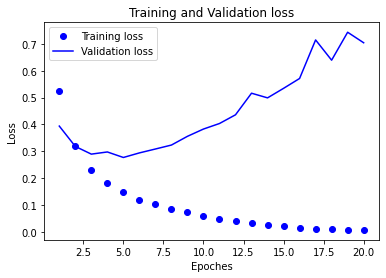

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()

plt.show()

plot acc and val_acc

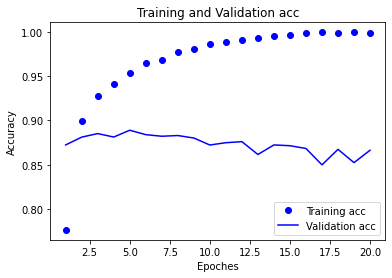

In [ ]:
plt.clf()

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

train a new model and stop at 4th epoch

In [ ]:
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
model.summary()
model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4995 - binary_accuracy: 0.7950
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2855 - binary_accuracy: 0.9058
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2137 - binary_accuracy: 0.9257
Epoch 4/4
782/782 [==============================] - 2s 2ms/ste

In [ ]:
model.predict(x_test)

array([[0.18288787],
       [0.9980028 ],
       [0.8523586 ],
       ...,
       [0.0987456 ],
       [0.07099523],
       [0.38324603]], dtype=float32)

## REUTERS_DEMO

Loads the Reuters newswire classification dataset.

This is a dataset of 11,228 newswires from Reuters, labeled over 46 topics.

This was originally generated by parsing and preprocessing the classic Reuters-21578 dataset, but the preprocessing code is no longer packaged with Keras. See this github discussion for more info.

Each newswire is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

In [ ]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


encoding features and labels

In [ ]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels,dimension=46):
  results = np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label]=1.
  return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

define the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def get_model():
  model = Sequential()
  model.add(Dense(64,activation='relu',input_shape=(10000,)))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(46,activation='softmax'))

  model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['acc'])
  return model

model = get_model()

hold out the validation set

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

fit the model

In [ ]:
history = model.fit(x=partial_x_train,
            y=partial_y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val,y_val))

plot the loss and val_loss

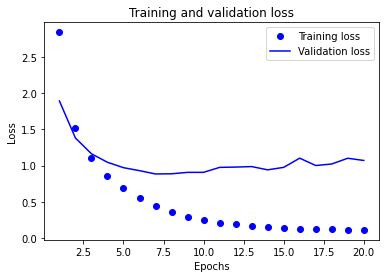

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plot the acc and val_acc

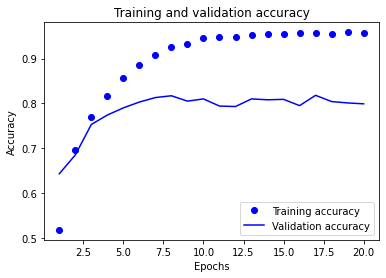

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = get_model()
history = model.fit(x=x_train,y=y_train,epochs=9,batch_size=512)
results = model.evaluate(x_test,y_test)

In [ ]:
results

[0.9984001517295837, 0.7867319583892822]

custom metrics

In [ ]:
from scipy.stats import kurtosis
import tensorflow as tf
def kurtosis_cal(y):
  results = kurtosis(y, axis=-1, fisher=False, bias=True, nan_policy='raise')
  return results

def my_loss_fn(y_true, y_pred):
  assert y_true 
  kurtosis_loss = tf.abs((kurtosis_cal(y_true)-kurtosis_cal(y_pred)).astype("float32"))
  return kurtosis_loss

In [ ]:

tf.keras.metrics.categorical_accuracy(y_test, predictions)

loss = my_loss_fn(y_test, predictions)
loss

<tf.Tensor: shape=(2246,), dtype=float32, numpy=
array([1.1040581e-03, 3.0148476e-01, 4.1712127e+00, ..., 7.0275200e-05,
       3.3678758e+00, 1.0871649e+01], dtype=float32)>

In [ ]:
t = tf.constant([1,2,3,4,5.])
t.value_index

AttributeError: ignored

## BOSTON_DEMO

Boston housing price regression dataset.

In [ ]:
from keras.datasets import boston_housing

(train_data,train_target),(test_data,test_target)=boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def get_model():
  model = Sequential()
  model.add(Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

K-fold cross-validation

In [ ]:
import numpy as np

k=4
num_val_samples = len(train_data)//k
num_epochs = 500
all_mae_history=[]

for i in range(k):
  print('processing fold #',i)
  val_data=train_data[ i*num_val_samples : (i+1)*num_val_samples ]
  val_targets = train_target[ i*num_val_samples : (i+1)*num_val_samples ]

  partial_training_data = np.r_[train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]]
  partial_training_targets = np.r_[train_target[:i*num_val_samples],train_target[(i+1)*num_val_samples:]]

  model = get_model()
  history = model.fit(partial_training_data,partial_training_targets,batch_size=16,
                      validation_data=(val_data,val_targets),verbose=0,epochs=num_epochs)
  mae_history = history.history['val_mae']
  all_mae_history.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
average_mae_history = [ np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

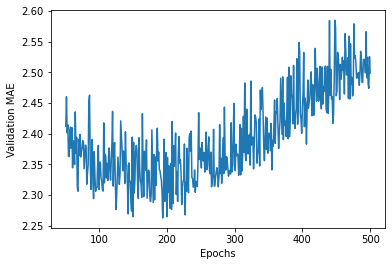

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(51,len(average_mae_history)+1),average_mae_history[50:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

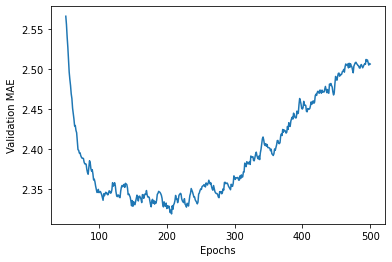

In [ ]:
def smooth_curve(points,factor=0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history)
plt.clf()
plt.plot(range(51,len(smooth_mae_history)+1),smooth_mae_history[50:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
model = get_model()
model.fit(train_data,train_target,epochs=100,batch_size=16,verbose=0)
test_mse_score,test_mae_score = model.evaluate(test_data,test_target,verbose=0)

In [ ]:
test_mae_score

2.5088918209075928

# DL for image

## MNIST

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape(60000,28,28,1)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape(10000,28,28,1)
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

def get_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  return model

In [ ]:
model = get_model()
model.compile(optimizer='rmsprop',
       loss='categorical_crossentropy',
       metrics=['accuracy'])
history = model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 3s 4ms/step - loss: 0.1663 - accuracy: 0.9478
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0450 - accuracy: 0.9857
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0323 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0238 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0191 - accuracy: 0.9941


In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0327 - accuracy: 0.9906


0.9905999898910522

## DOGS_VS_CATS

### Data preparation

In [ ]:
!unzip /content/drive/MyDrive/data/cats-and-dogs.zip -d /content/data

In [ ]:
import os,shutil

original_dataset_dir = '/content/data/cats_and_dogs/validation'
base_dir = '/content/cats_and_dogs_small'

os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,'cats',fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,'cats',fname)
  dst = os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,'cats',fname)
  dst = os.path.join(test_cats_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,'dogs',fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)
  
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,'dogs',fname)
  dst = os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,'dogs',fname)
  dst = os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
len(os.listdir(train_dogs_dir))

1000

### Define the convnet

In [ ]:
from keras.layers import *
from keras.models import Sequential

def get_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  return model

In [ ]:
model = get_model()
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])

### Define data generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Fit the model

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps = 50)

model.save('/content/drive/My Drive/model/cats_and_dogs_small_1.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6861 - acc: 0.5545 - val_loss: 0.6868 - val_acc: 0.5040
Epoch 2/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6507 - acc: 0.6185 - val_loss: 0.6276 - val_acc: 0.6510
Epoch 3/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6003 - acc: 0.6740 - val_loss: 0.6062 - val_acc: 0.6710
Epoch 4/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5559 - acc: 0.7105 - val_loss: 0.5858 - val_acc: 0.6740
Epoch 5/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5243 - acc: 0.7330 - val_loss: 0.5884 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 9s 88ms/step - loss: 0.5004 - acc: 0.7525 - val_loss: 0.5639 - val_acc: 0.7160
Epoch 7/30
100/100 [==============================] - 9s 89ms/step - loss: 0.4591 - acc: 0.7790 - val_loss: 0.5775 - val_acc: 

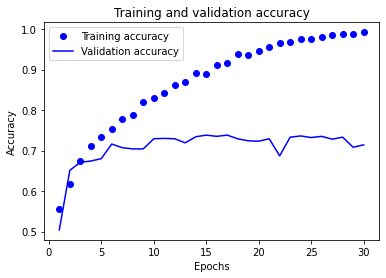

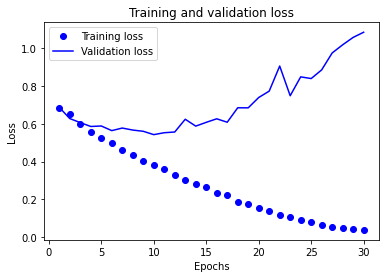

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Data augmentation & dropout

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from keras.layers import *
from keras.models import Sequential

def get_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(512,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  return model

In [ ]:
model = get_model()
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data = validation_generator,
    validation_steps = 50)

model.save('/content/drive/My Drive/model/cats_and_dogs_small_2.h5')

In [ ]:
model.evaluate_generator(test_generator,steps=50)

[0.5638711452484131, 0.7170000076293945]

## Pretrained network VGG16

### Get the VGG16

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
          include_top=False,
          input_shape=(150,150,3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### Extract features with pretrained VGG16

In [ ]:
import numpy as np

data_gen = ImageDataGenerator(rescale=1.0/255)
batch_size = 20

def extract_features(directory,sample_count):
  features = np.zeros(shape=(sample_count,4,4,512))
  labels = np.zeros(shape=(sample_count))
  generator = data_gen.flow_from_directory(
      directory,
      target_size=(150,150),
      batch_size = batch_size,
      class_mode = 'binary')
  i=0
  for inputs_batch,labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size:(i+1)*batch_size] = features_batch
    labels[i*batch_size:(i+1)*batch_size] = labels_batch
    i+=1
    if i*batch_size >= sample_count:
      break
  return features,labels

In [ ]:
train_features,train_labels = extract_features(train_dir,2000)
validation_features,validation_labels = extract_features(validation_dir,1000)
test_features,test_labels = extract_features(test_dir,1000)

train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from keras.layers import *
from keras.models import Sequential

def get_model():
  model = Sequential()
  model.add(Dense(256,activation='relu',input_dim=(4*4*512)))
  model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))
  return model

In [ ]:
model = get_model()
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])

In [ ]:
history = model.fit(train_features,train_labels,epochs=30,batch_size=20,validation_data=(validation_features,validation_labels))
model.save('/content/drive/My Drive/model/cats_and_dogs_small_3.h5')

Epoch 1/30
100/100 [==============================] - 0s 4ms/step - loss: 0.7474 - acc: 0.7460 - val_loss: 0.3223 - val_acc: 0.8510
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3633 - acc: 0.8470 - val_loss: 0.6511 - val_acc: 0.7520
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3030 - acc: 0.8760 - val_loss: 0.2669 - val_acc: 0.8790
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2450 - acc: 0.9035 - val_loss: 0.2586 - val_acc: 0.9040
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2098 - acc: 0.9180 - val_loss: 0.2911 - val_acc: 0.8860
Epoch 6/30
100/100 [==============================] - 0s 3ms/step - loss: 0.1963 - acc: 0.9260 - val_loss: 0.3483 - val_acc: 0.8680
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.1636 - acc: 0.9380 - val_loss: 0.3417 - val_acc: 0.8920
Epoch 8/30
100/100 [==============================] - 0s 3ms/step - loss: 0.

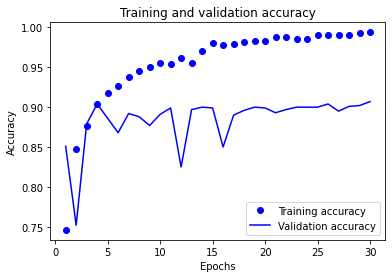

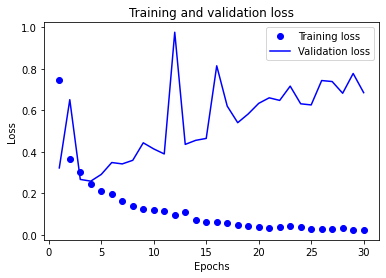

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Creat a new model based on conv_base

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from keras.layers import *
from keras.models import Sequential

def get_model():
  model = Sequential()
  model.add(conv_base)
  model.add(Flatten())
  model.add(Dense(256,activation='relu',input_dim=(4*4*512)))
  model.add(Dense(1,activation='sigmoid'))
  conv_base.trainable=False
  return model

In [ ]:
model = get_model()
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps = 50)

model.save('/content/drive/My Drive/model/cats_and_dogs_small_4.h5')

Epoch 1/30
100/100 [==============================] - 20s 205ms/step - loss: 0.3590 - acc: 0.8455 - val_loss: 0.2102 - val_acc: 0.9110
Epoch 2/30
100/100 [==============================] - 21s 206ms/step - loss: 0.2357 - acc: 0.9070 - val_loss: 0.2011 - val_acc: 0.9150
Epoch 3/30
100/100 [==============================] - 21s 206ms/step - loss: 0.2084 - acc: 0.9105 - val_loss: 0.1796 - val_acc: 0.9150
Epoch 4/30
100/100 [==============================] - 20s 198ms/step - loss: 0.2131 - acc: 0.9140 - val_loss: 0.1803 - val_acc: 0.9220
Epoch 5/30
100/100 [==============================] - 20s 200ms/step - loss: 0.1917 - acc: 0.9260 - val_loss: 0.1825 - val_acc: 0.9200
Epoch 6/30
100/100 [==============================] - 20s 200ms/step - loss: 0.2047 - acc: 0.9160 - val_loss: 0.2073 - val_acc: 0.9200
Epoch 7/30
100/100 [==============================] - 20s 201ms/step - loss: 0.1948 - acc: 0.9225 - val_loss: 0.1831 - val_acc: 0.9230
Epoch 8/30
100/100 [==============================] - 2

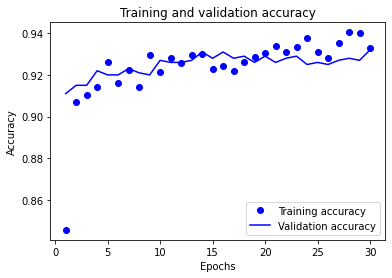

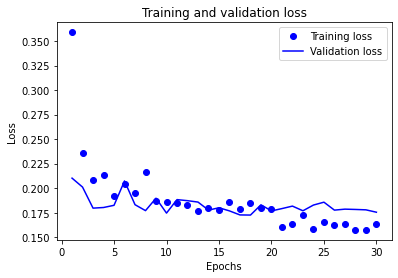

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Fine tune

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/model/cats_and_dogs_small_4.h5')

In [ ]:
conv_base = model.get_layer('vgg16')
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = keras.optimizers.RMSprop(lr=1e-5),
    loss = 'binary_crossentropy',
    metrics = ['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data = validation_generator,
    validation_steps = 50)

model.save('/content/drive/My Drive/model/cats_and_dogs_small_5.h5')

Epoch 1/100
100/100 [==============================] - 18s 177ms/step - loss: 0.1821 - acc: 0.9150 - val_loss: 0.2312 - val_acc: 0.9010
Epoch 2/100
100/100 [==============================] - 18s 175ms/step - loss: 0.1732 - acc: 0.9290 - val_loss: 0.1646 - val_acc: 0.9280
Epoch 3/100
100/100 [==============================] - 17s 173ms/step - loss: 0.1547 - acc: 0.9380 - val_loss: 0.1766 - val_acc: 0.9250
Epoch 4/100
100/100 [==============================] - 17s 173ms/step - loss: 0.1569 - acc: 0.9405 - val_loss: 0.1774 - val_acc: 0.9220
Epoch 5/100
100/100 [==============================] - 17s 173ms/step - loss: 0.1571 - acc: 0.9395 - val_loss: 0.1840 - val_acc: 0.9210
Epoch 6/100
100/100 [==============================] - 17s 174ms/step - loss: 0.1449 - acc: 0.9415 - val_loss: 0.1900 - val_acc: 0.9190
Epoch 7/100
100/100 [==============================] - 17s 174ms/step - loss: 0.1309 - acc: 0.9505 - val_loss: 0.1847 - val_acc: 0.9290
Epoch 8/100
100/100 [===========================

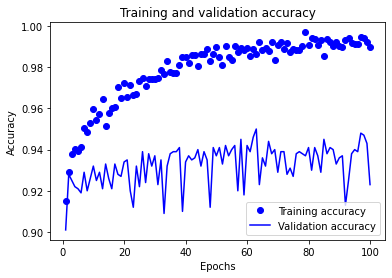

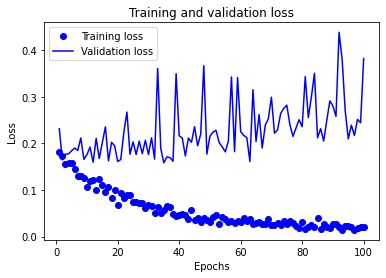

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate_generator(test_generator,steps=50)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.38180115818977356, 0.9229999780654907]

## Visualization

### Outputs

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/model/cats_and_dogs_small_2.h5')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
img_path='/content/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /= 255.

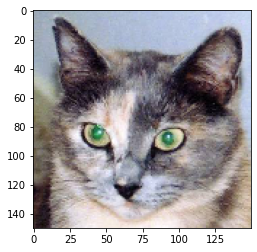

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


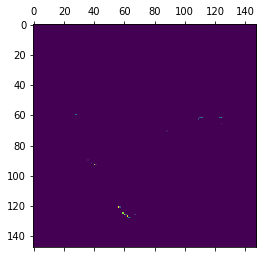

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0,:,:,6],cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


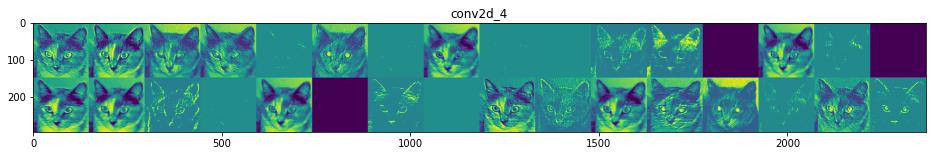

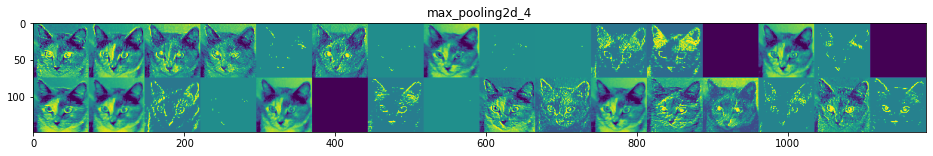

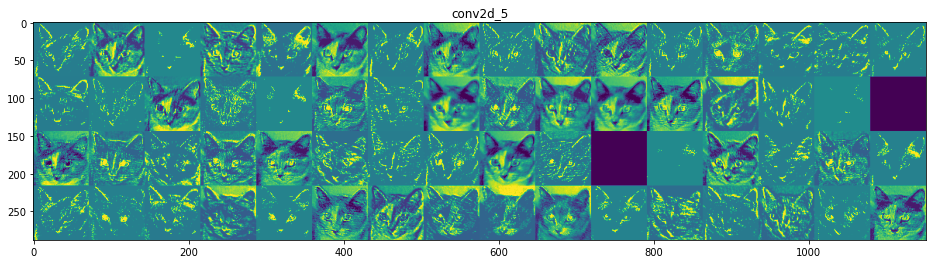

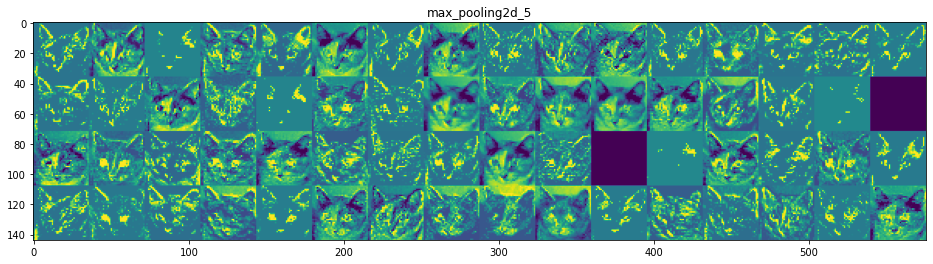

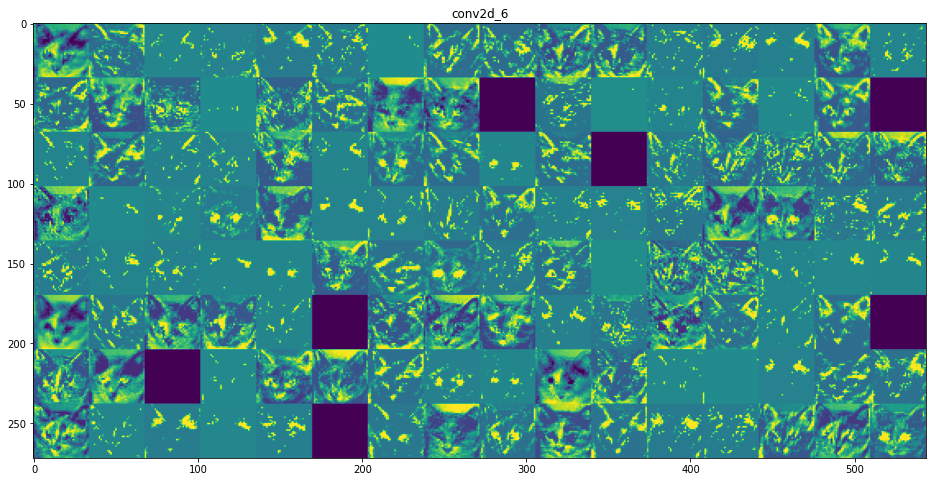

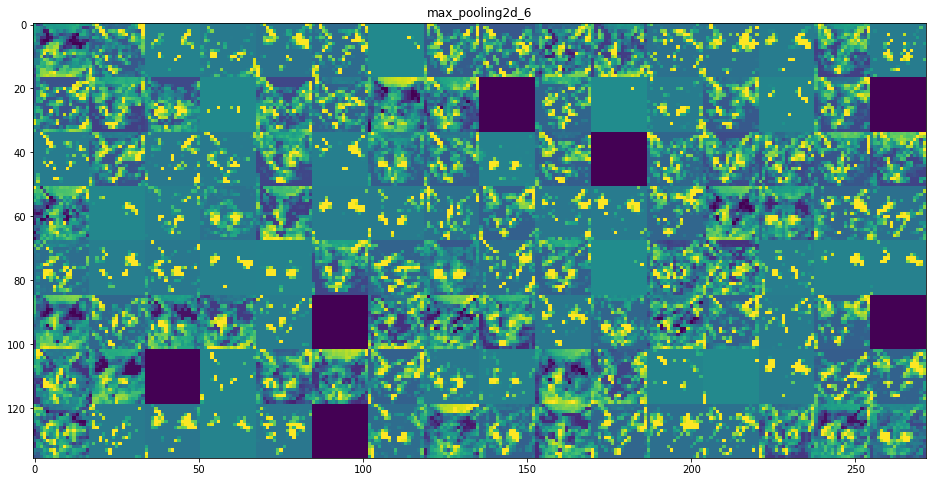

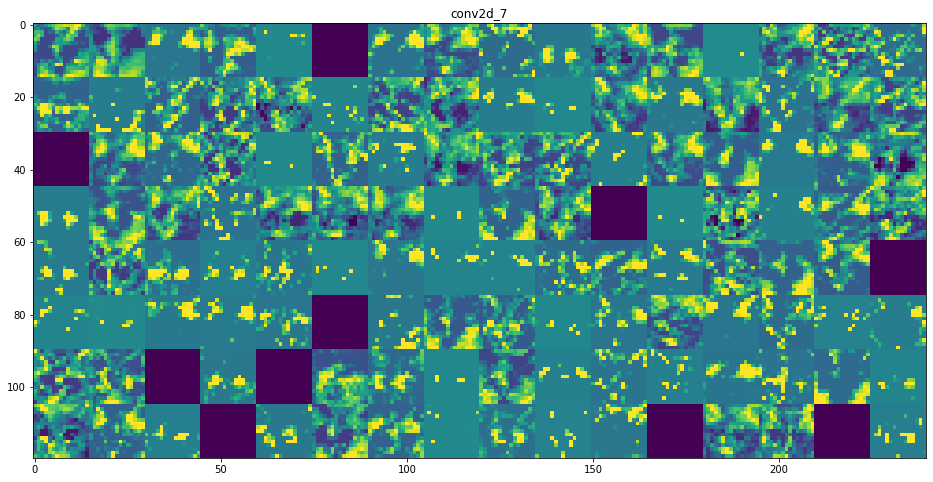

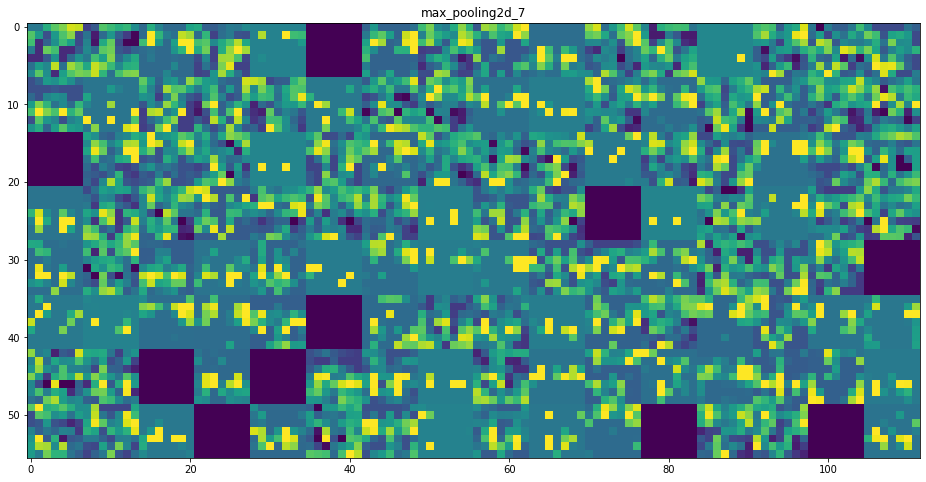

In [ ]:
layer_names=[]
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name,layer_activation in zip(layer_names,activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features//images_per_row
  display_grid =np.zeros((size*n_cols,images_per_row*size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,:,:,col*images_per_row+row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image,0,255).astype('uint8')
      display_grid[ col*size:(col+1)*size, row*size:(row+1)*size] = channel_image
  
  scale = 1.0/size

  plt.figure(figsize=(scale*display_grid.shape[1],
                scale*display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid,aspect='auto',cmap='viridis')


### Filters

In [ ]:
from keras.applications import VGG16
from keras import backend as K
import numpy as np

model = VGG16(weights='imagenet',
          include_top=False,
          input_shape=(150,150,3))
layer_name = 'block3_conv1'
filter_index = 0

In [ ]:
def deprocess_image(x):
  x -= x.mean()
  x /= (x.std()+1e-5)
  x *= 0.1

  x += 0.5
  x = np.clip(x,0,1)
  x *= 255
  x = np.clip(x,0,255).astype('uint8')
  return x

### Class activation map

In [ ]:
from keras.applications import VGG16

model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 6s 0us/step


In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

# DL for text

Processing text data

## Tokenization

In [ ]:
# One-hot encoding at word level
# When online encoding is required, hash can be used.
import numpy as np

samples={'This cat sat on the mat.','The dog ate my homework.'}
token_index={}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word]=len(token_index)+1

max_length = 10
results = np.zeros(shape=(len(samples),max_length,max(token_index.values())+1))

for i,samples in enumerate(samples):
  for j,word in list(enumerate(samples.split()))[:max_length]:
    index = token_index.get(word)
    results[i,j,index]=1.

In [ ]:
# One-hot encoding at the character level
import string

samples={'This cat sat on the mat.','The dog ate my homework.'}

characters=string.printable
token_index=dict(zip(characters,range(1,len(characters)+1))) 

max_length = 50
results = np.zeros(shape=(len(samples),max_length,max(token_index.values())+1))

for i,samples in enumerate(samples):
  for j,character in enumerate(samples[:max_length]):
    index = token_index.get(character)
    results[i,j,index]=1.

In [ ]:
# One-hot encoding with keras
from keras.preprocessing.text import Tokenizer

samples={'This cat sat on the mat.','The dog ate my homework.'}
tokenizer = Tokenizer(1000)
tokenizer.fit_on_texts(samples)

sequences=tokenizer.texts_to_sequences(samples)
one_hot_results=tokenizer.texts_to_matrix(samples,'binary')

word_index=tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 10 unique tokens.


## Word embedding

### Train on data

In [ ]:
from keras import preprocessing
from keras.datasets import imdb
max_features = 10000
maxlen = 20

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

def get_model(embedding_dim=8,maxlen=20):
  model = Sequential()
  model.add(Embedding(10000,embedding_dim,input_length=maxlen))
  model.add(Flatten())
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
  return model

In [ ]:
model = get_model()
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

### Pretraining embedding with Glove

In [ ]:
!wget --no-check-certificate -c https://mng.bz/0tIo -O aclImbd.zip

In [ ]:
!unzip -n aclImbd.zip

In [ ]:
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir,'train')

labels=[]
texts=[]

for label_type in ['neg','pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:]=='.txt':
      f = open(os.path.join(dir_name,fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('find %s unique tokens' %len(word_index))

data = pad_sequences(sequences,maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor: ',data.shape)
print('Shape of label tensor: ',labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
x = data[indices]
y = labels[indices]

x_train = x[:training_samples]
x_val = x[training_samples:training_samples+validation_samples]
y_train = y[:training_samples]
y_val = y[training_samples:training_samples+validation_samples]

find 88582 unique tokens
Shape of data tensor:  (25000, 100)
Shape of label tensor:  (25000,)


download GloVe

In [ ]:
!wget --no-check-certificate -c http://nlp.stanford.edu/data/glove.6B.zip -O glove.6B.zip -nc

File ‘glove.6B.zip’ already there; not retrieving.


In [ ]:
!cp -n glove.6B.zip /content/drive/MyDrive/data

In [ ]:
!unzip -n /content/drive/MyDrive/data/glove.6B.zip -d /content/glove

Archive:  glove.6B.zip
file #1:  bad zipfile offset (local header sig):  0


In [ ]:
glove_fname = '/content/glove/glove.6B.100d.txt'
embedding_index = {}
f = open(glove_fname)
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:],dtype='float32')
  embedding_index[word] = coefs
f.close()

print('Found %s word vectors' % len(embedding_index))

Found 400000 word vectors


In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words,embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

def get_model(embedding_dim=100,maxlen=100):
  model = Sequential()
  model.add(Embedding(10000,embedding_dim,input_length=maxlen))
  model.add(Flatten())
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  return model

In [ ]:
model = get_model()
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val))
model.save_weights('/content/drive/MyDrive/model/imdb_glove/pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 3s 128ms/step - loss: 1.9340 - acc: 0.5895 - val_loss: 0.7130 - val_acc: 0.5120
Epoch 2/10
7/7 [==============================] - 1s 101ms/step - loss: 0.6967 - acc: 0.7639 - val_loss: 0.7022 - val_acc: 0.5412
Epoch 3/10
7/7 [==============================] - 1s 104ms/step - loss: 0.3266 - acc: 0.9121 - val_loss: 0.7781 - val_acc: 0.5295
Epoch 4/10
7/7 [==============================] - 1s 103ms/step - loss: 0.3389 - acc: 0.8793 - val_loss: 0.8921 - val_acc: 0.5112
Epoch 5/10
7/7 [==============================] - 1s 105ms/step - loss: 0.1711 - acc: 0.9403 - val_loss: 0.7330 - val_acc: 0.5574
Epoch 6/10
7/7 [==============================] - 1s 103ms/step - loss: 0.1000 - acc: 0.9867 - val_loss: 1.1421 - val_acc: 0.5015
Epoch 7/10
7/7 [==============================] - 1s 103ms/step - loss: 0.1161 - acc: 0.9892 - val_loss: 0.7615 - val_acc: 0.5564
Epoch 8/10
7/7 [==============================] - 1s 103ms/step - loss: 0.0304 - acc: 1.00

if without pretraining

In [ ]:
model = get_model()
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/10
7/7 [==============================] - 1s 128ms/step - loss: 0.6973 - acc: 0.4613 - val_loss: 0.6923 - val_acc: 0.5125
Epoch 2/10
7/7 [==============================] - 1s 105ms/step - loss: 0.5259 - acc: 0.9914 - val_loss: 0.6974 - val_acc: 0.5117
Epoch 3/10
7/7 [==============================] - 1s 105ms/step - loss: 0.2949 - acc: 0.9981 - val_loss: 0.6953 - val_acc: 0.5272
Epoch 4/10
7/7 [==============================] - 1s 104ms/step - loss: 0.1227 - acc: 1.0000 - val_loss: 0.7026 - val_acc: 0.5239
Epoch 5/10
7/7 [==============================] - 1s 109ms/step - loss: 0.0575 - acc: 1.0000 - val_loss: 0.7029 - val_acc: 0.5278
Epoch 6/10
7/7 [==============================] - 1s 105ms/step - loss: 0.0300 - acc: 1.0000 - val_loss: 0.7090 - val_acc: 0.5270
Epoch 7/10
7/7 [==============================] - 1s 108ms/step - loss: 0.0160 - acc: 1.0000 - val_loss: 0.7122 - val_acc: 0.5315
Epoch 8/10
7/7 [==============================] - 1s 107ms/step - loss: 0.0092 - acc: 1.00

evaluate on testing set (load pretraining weights)

In [ ]:
import os

imdb_dir = '/content/aclImdb'
test_dir = os.path.join(imdb_dir,'test')

labels=[]
texts=[]

for label_type in ['neg','pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:]=='.txt':
      f = open(os.path.join(dir_name,fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences,maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
model = get_model()
model.load_weights('/content/drive/MyDrive/model/imdb_glove/pre_trained_glove_model.h5')
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8251 - acc: 0.5574


[0.8250783681869507, 0.5573599934577942]

## SimpleRNN

In [ ]:
# demo
import numpy as np

timesteps=100
input_features=32
output_features=64

inputs=np.random.random((timesteps,input_features))
state_t=np.zeros((output_features))

W = np.random.random((output_features,input_features))
U = np.random.random((output_features,output_features))
b = np.random.random((output_features))

successive_outputs=[]
for input_t in inputs:
  output_t = np.tanh(np.dot(W,input_t)+np.dot(U,state_t)+b)

  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(successive_outputs,axis=0)

In [ ]:
from keras import preprocessing
from keras.datasets import imdb
max_features = 10000
maxlen = 500
batch_size = 32


(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
from keras.layers import Dense,SimpleRNN,Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,
            epochs=10,
            batch_size=128,
            validation_split=0.2)
model.save_weights('imdb_simpleRNN.h5')

Epoch 1/10
157/157 [==============================] - 82s 506ms/step - loss: 0.6847 - acc: 0.5416 - val_loss: 0.5125 - val_acc: 0.7672
Epoch 2/10
157/157 [==============================] - 79s 502ms/step - loss: 0.4554 - acc: 0.7992 - val_loss: 0.3726 - val_acc: 0.8424
Epoch 3/10
157/157 [==============================] - 80s 508ms/step - loss: 0.2965 - acc: 0.8813 - val_loss: 0.3376 - val_acc: 0.8648
Epoch 4/10
157/157 [==============================] - 80s 507ms/step - loss: 0.2605 - acc: 0.8943 - val_loss: 0.4899 - val_acc: 0.7832
Epoch 5/10
157/157 [==============================] - 79s 504ms/step - loss: 0.1615 - acc: 0.9421 - val_loss: 0.4395 - val_acc: 0.8180
Epoch 6/10
157/157 [==============================] - 79s 504ms/step - loss: 0.1062 - acc: 0.9645 - val_loss: 0.4181 - val_acc: 0.8462
Epoch 7/10
157/157 [==============================] - 79s 505ms/step - loss: 0.0993 - acc: 0.9645 - val_loss: 0.7220 - val_acc: 0.7530
Epoch 8/10
157/157 [==============================] - 7

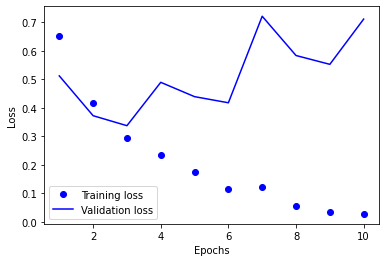

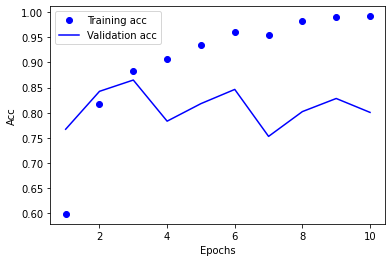

In [ ]:
history_plot(history)

## LSTM

In [ ]:
from keras.layers import Dense,LSTM,Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,
            epochs=10,
            batch_size=128,
            validation_split=0.2)
model.save_weights('imdb_LSTM.h5')
history_plot(history)

## Advanced usage

```
!wget -c https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!cp -n jena_climate_2009_2016.csv.zip /content/drive/MyDrive/data
```



In [ ]:
!unzip -n /content/drive/MyDrive/data/jena_climate_2009_2016.csv.zip -d /content/jena_climate

Archive:  /content/drive/MyDrive/data/jena_climate_2009_2016.csv.zip
  inflating: /content/jena_climate/jena_climate_2009_2016.csv  


In [ ]:
import os 

data_dir = '/content/jena_climate'
fname = os.path.join(data_dir,'jena_climate_2009_2016.csv')
f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [ ]:
import numpy as np

float_data = np.zeros((len(lines),len(header)-1))

for i,line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i,:] = values

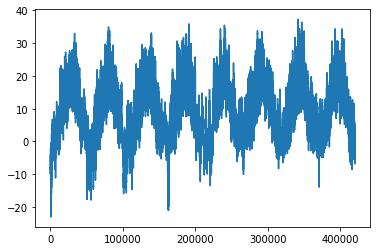

In [ ]:
from matplotlib import pyplot as plt

temp = float_data[:,1]
plt.plot(range(len(temp)),temp)
plt.show()

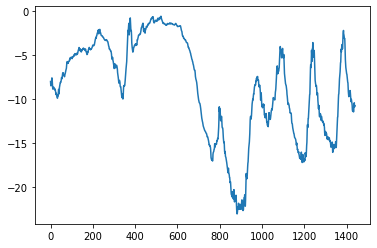

In [ ]:
plt.plot(range(1440),temp[:1440])
plt.show()

In [ ]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [ ]:
def generator(data,lookback,delay,min_index,max_index,shuffle=False,batch_size=128,step=6):
  if max_index is None:
    max_index = len(data)-delay-1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
          min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i,min(i+batch_size,max_index))
      i += len(rows)
    
    samples = np.zeros((len(rows),
               lookback//step,
               data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j,row in enumerate(rows):
      indices = range(rows[j]-lookback,rows[j],step)
      samples[j] = data[indices]
      targets[j] = data[rows[j]+delay][1]
    yield samples, targets   

In [ ]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step,
    batch_size=batch_size)
val_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size)
test_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=300001,
    max_index=None,
    step=step,
    batch_size=batch_size)

val_steps = (300000-200001-lookback) // batch_size
test_steps = (len(float_data)-300001-lookback) // batch_size

In [ ]:
def evaluate_naive_method(val_gen):
  batch_maes=[]
  for step in range(val_steps):
    samples, targets = next(val_gen)
    preds = samples[:,-1,1]
    mae = np.mean(np.abs(preds-targets))
    batch_maes.append(mae)
  mean_mae = np.mean(batch_maes)
  print(mean_mae)
  return mean_mae

celsius_mae = evaluate_naive_method(val_gen) *std[1]
celsius_mae

0.2897359729905486


2.564887434980494

### A basic network

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(Flatten(input_shape=(lookback//step,float_data.shape[-1])))
model.add(Dense(32,activation='relu')) 
model.add(Dense(1))
model.compile(optimizer=RMSprop(),loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=20,validation_data=val_gen,validation_steps=val_steps)
history_plot(history)

### GRU network

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,GRU
from keras.optimizers import RMSprop

model = Sequential()
model.add(GRU(32,input_shape=(None,float_data.shape[-1]))) 
model.add(Dense(1))
model.compile(optimizer=RMSprop(),loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=20,validation_data=val_gen,validation_steps=val_steps)
history_plot(history)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,GRU
from keras.optimizers import RMSprop

model = Sequential()
model.add(GRU(32,
        dropout=0.2,
        recurrent_dropout=0.2,
        input_shape=(None,float_data.shape[-1]))) 
model.add(Dense(1))
model.compile(optimizer=RMSprop(),loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=40,validation_data=val_gen,validation_steps=val_steps)
history_plot(history)
model.save('/content/drive/My Drive/model/jena_climate_gru_dropout.h5')

### Recurrent layer stacking

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,GRU
from keras.optimizers import RMSprop

model = Sequential()
model.add(GRU(32,
        dropout=0.1,
        recurrent_dropout=0.5,
        return_sequences=True,
        input_shape=(None,float_data.shape[-1]))) 
model.add(GRU(64,activation='relu',
        dropout=0.1,
        recurrent_dropout=0.5))
model.add(Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=500,epochs=40,validation_data=val_gen,validation_steps=val_steps)
history_plot(history)
model.save('/content/drive/My Drive/model/jena_climate_gru_stacking.h5')

### Reverse-order training LSTM

In [ ]:
from keras import preprocessing
from keras.datasets import imdb
max_features = 10000
maxlen = 500

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = preprocessing.sequence.pad_sequences(x_train,maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/10
157/157 [==============================] - 9s 50ms/step - loss: 0.5705 - acc: 0.6903 - val_loss: 0.3698 - val_acc: 0.8506
Epoch 2/10
157/157 [==============================] - 7s 45ms/step - loss: 0.3047 - acc: 0.8857 - val_loss: 0.3221 - val_acc: 0.8700
Epoch 3/10
157/157 [==============================] - 7s 46ms/step - loss: 0.2428 - acc: 0.9129 - val_loss: 0.3156 - val_acc: 0.8844
Epoch 4/10
157/157 [==============================] - 7s 46ms/step - loss: 0.1999 - acc: 0.9270 - val_loss: 0.3913 - val_acc: 0.8608
Epoch 5/10
157/157 [==============================] - 7s 46ms/step - loss: 0.1765 - acc: 0.9389 - val_loss: 0.3334 - val_acc: 0.8708
Epoch 6/10
157/157 [==============================] - 7s 46ms/step - loss: 0.1604 - acc: 0.9456 - val_loss: 0.3814 - val_acc: 0.8784
Epoch 7/10
157/157 [==============================] - 7s 46ms/step - loss: 0.1595 - acc: 0.9480 - val_loss: 0.4220 - val_acc: 0.8642
Epoch 8/10
157/157 [==============================] - 7s 46ms/step - 

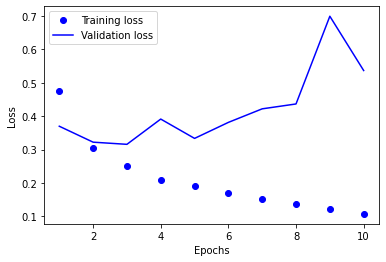

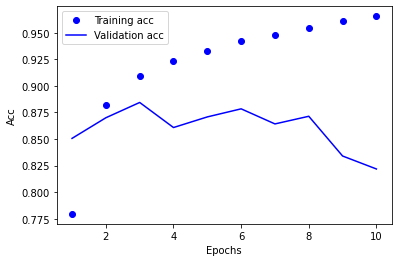

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,LSTM
from keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(10000,128))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,
            epochs=10,
            batch_size=128,
            validation_split=0.2)
history_plot(history)

### Bidirectional LSTM

Epoch 1/10
157/157 [==============================] - 10s 50ms/step - loss: 0.6324 - acc: 0.6294 - val_loss: 0.4205 - val_acc: 0.8104
Epoch 2/10
157/157 [==============================] - 7s 45ms/step - loss: 0.3317 - acc: 0.8650 - val_loss: 0.3160 - val_acc: 0.8748
Epoch 3/10
157/157 [==============================] - 7s 45ms/step - loss: 0.2404 - acc: 0.9120 - val_loss: 0.2955 - val_acc: 0.8788
Epoch 4/10
157/157 [==============================] - 7s 45ms/step - loss: 0.1963 - acc: 0.9292 - val_loss: 0.2813 - val_acc: 0.8882
Epoch 5/10
157/157 [==============================] - 7s 45ms/step - loss: 0.1748 - acc: 0.9388 - val_loss: 0.3690 - val_acc: 0.8632
Epoch 6/10
157/157 [==============================] - 7s 44ms/step - loss: 0.1555 - acc: 0.9441 - val_loss: 0.4177 - val_acc: 0.8504
Epoch 7/10
157/157 [==============================] - 7s 45ms/step - loss: 0.1393 - acc: 0.9505 - val_loss: 0.4430 - val_acc: 0.8740
Epoch 8/10
157/157 [==============================] - 7s 45ms/step -

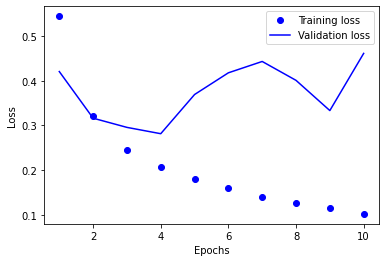

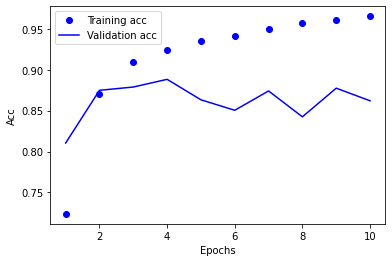

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,LSTM,Bidirectional
from keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(10000,32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,
            epochs=10,
            batch_size=128,
            validation_split=0.2)
history_plot(history)

## Conv1D

In [ ]:
from keras import preprocessing
from keras.datasets import imdb
max_features = 10000
max_len = 500

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train,max_len)
x_test = preprocessing.sequence.pad_sequences(x_test,max_len)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/10
157/157 [==============================] - 6s 32ms/step - loss: 2.3020 - acc: 0.4961 - val_loss: 0.6888 - val_acc: 0.5370
Epoch 2/10
157/157 [==============================] - 5s 30ms/step - loss: 0.6761 - acc: 0.6179 - val_loss: 0.6648 - val_acc: 0.6452
Epoch 3/10
157/157 [==============================] - 5s 30ms/step - loss: 0.6357 - acc: 0.7471 - val_loss: 0.6104 - val_acc: 0.7104
Epoch 4/10
157/157 [==============================] - 5s 30ms/step - loss: 0.5543 - acc: 0.8078 - val_loss: 0.4838 - val_acc: 0.8000
Epoch 5/10
157/157 [==============================] - 5s 30ms/step - loss: 0.4247 - acc: 0.8428 - val_loss: 0.4284 - val_acc: 0.8280
Epoch 6/10
157/157 [==============================] - 5s 30ms/step - loss: 0.3462 - acc: 0.8767 - val_loss: 0.4076 - val_acc: 0.8532
Epoch 7/10
157/157 [==============================] - 5s 30ms/step - loss: 0.3025 - acc: 0.8923 - val_loss: 0.4349 - val_acc: 0.8578
Epoch 8/10
157/157 [==============================] - 5s 30ms/step - 

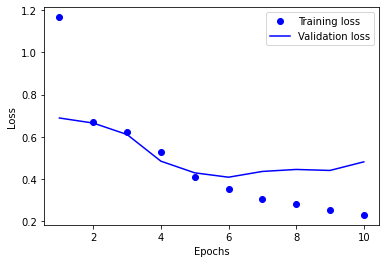

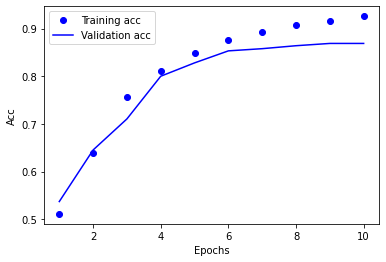

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(10000,128))
model.add(Conv1D(32,7,activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32,7,activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

model.compile(optimizer=RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,
            epochs=10,
            batch_size=128,
            validation_split=0.2)
history_plot(history)
model.save('imdb_Conv1.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 12s 23ms/step - loss: 0.4602 - val_loss: 0.5001
Epoch 2/20
500/500 [==============================] - 11s 23ms/step - loss: 0.3683 - val_loss: 0.4391
Epoch 3/20
500/500 [==============================] - 11s 23ms/step - loss: 0.3432 - val_loss: 0.4476
Epoch 4/20
500/500 [==============================] - 11s 23ms/step - loss: 0.3262 - val_loss: 0.4587
Epoch 5/20
500/500 [==============================] - 11s 23ms/step - loss: 0.3125 - val_loss: 0.4593
Epoch 6/20
500/500 [==============================] - 11s 23ms/step - loss: 0.3080 - val_loss: 0.4633
Epoch 7/20
500/500 [==============================] - 11s 23ms/step - loss: 0.2987 - val_loss: 0.4576
Epoch 8/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2900 - val_loss: 0.4671
Epoch 9/20
500/500 [==============================] - 11s 23ms/step - loss: 0.2871 - val_loss: 0.4662
Epoch 10/20
500/500 [==============================] - 11s 23ms/step - loss: 0.277

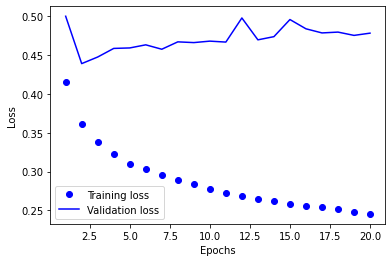

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

model = Sequential()
model.add(Conv1D(32,5,activation='relu',input_shape=(None,float_data.shape[-1])))
model.add(MaxPooling1D(3))
model.add(Conv1D(32,5,activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(32,5,activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
history = model.fit_generator(train_gen,
                steps_per_epoch=500,
                epochs=20,
                validation_data=val_gen,
                validation_steps=val_steps)
history_plot(history)
model.save('jena_climate_Conv1.h5')

In [ ]:
lookback = 1440
step = 3
delay = 144
batch_size = 128

train_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step,
    batch_size=batch_size)
val_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size)
test_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=300001,
    max_index=None,
    step=step,
    batch_size=batch_size)

val_steps = (300000-200001-lookback) // batch_size
test_steps = (len(float_data)-300001-lookback) // batch_size

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

model = Sequential()
model.add(Conv1D(32,5,activation='relu',input_shape=(None,float_data.shape[-1])))
model.add(MaxPooling1D(3))
model.add(Conv1D(32,5,activation='relu'))
model.add(GRU(32))
model.add(Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
history = model.fit_generator(train_gen,
                steps_per_epoch=500,
                epochs=20,
                validation_data=val_gen,
                validation_steps=val_steps)
history_plot(history)
model.save('jena_climate_Conv1_GRU.h5')

# Advanced deep learing API

## Multi-input problem

In [ ]:
from keras import Input
from keras.models import Model
from keras.layers import *

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,),dtype='int32',name='text')
embedded_text = Embedding(text_vocabulary_size,64)(text_input)
encoded_text = LSTM(32)(embedded_text)

question_input = Input(shape=(None,),dtype='int32',name='question')
embedded_question = Embedding(question_vocabulary_size,32)(question_input)
encoded_question = LSTM(32)(embedded_question)

concatenated = concatenate([encoded_text,encoded_question],axis=-1)
answer = Dense(answer_vocabulary_size,activation='softmax')(concatenated)

model = Model([text_input,question_input],answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
import numpy as np

num_samples = 1000
max_length = 100

text = np.random.randint(1,text_vocabulary_size,size=(num_samples,max_length))
question = np.random.randint(1,question_vocabulary_size,size=(num_samples,max_length))
answers = np.random.randint(1,answer_vocabulary_size,size=(num_samples))
answers = keras.utils.to_categorical(answers,answer_vocabulary_size)

history = model.fit([text,question],answers,epochs=10,batch_size=128)

Epoch 1/10
8/8 [==============================] - 0s 22ms/step - loss: 6.2646 - acc: 0.0010
Epoch 2/10
8/8 [==============================] - 0s 21ms/step - loss: 6.1496 - acc: 0.0070
Epoch 3/10
8/8 [==============================] - 0s 21ms/step - loss: 6.0328 - acc: 0.0070
Epoch 4/10
8/8 [==============================] - 0s 21ms/step - loss: 5.9132 - acc: 0.0090
Epoch 5/10
8/8 [==============================] - 0s 21ms/step - loss: 5.8194 - acc: 0.0150
Epoch 6/10
8/8 [==============================] - 0s 21ms/step - loss: 5.7088 - acc: 0.0210
Epoch 7/10
8/8 [==============================] - 0s 21ms/step - loss: 5.6315 - acc: 0.0270
Epoch 8/10
8/8 [==============================] - 0s 21ms/step - loss: 5.5468 - acc: 0.0250
Epoch 9/10
8/8 [==============================] - 0s 21ms/step - loss: 5.4623 - acc: 0.0400
Epoch 10/10
8/8 [==============================] - 0s 22ms/step - loss: 5.4043 - acc: 0.0430


## Multi-output problem

In [ ]:
from keras import Input
from keras.models import Model
from keras.layers import *

vocabulary_size = 50000
num_income_groups = 10


posts_input = Input(shape=(None,),dtype='int32',name='posts')
embedded_posts = Embedding(vocabulary_size,256)(posts_input)
x = Conv1D(128,5,activation='relu')(embedded_posts)
x = MaxPool1D(5)(x)
x = Conv1D(256,5,activation='relu')(x)
x = Conv1D(256,5,activation='relu')(x)
x = MaxPool1D(5)(x)
x = Conv1D(256,5,activation='relu')(x)
x = Conv1D(256,5,activation='relu')(x)
x = GlobalMaxPool1D()(x)
x = Dense(128,activation='relu')(x)

age_prediction = Dense(1,name='age')(x)
income_prediction = Dense(num_income_groups,activation='softmax',name='income')(x)
gender_prediction = Dense(1,activation='sigmoid',name='gender')(x)

model = Model(posts_input,[age_prediction,income_prediction,gender_prediction])

model.compile(optimizer='rmsprop',
        loss={'age':'mse',
          'income':'categorical_crossentropy',
          'gender':'binary_crossentropy'},
        loss_weights={'age':0.25,
                'income':1.,
                'gender':10.})

In [ ]:
'''
history = model.fit(posts,[age_targets,income_targets,gender_targets],
                    epochs=10,
                    batch_size=64)
'''

## Shared layer or model

In [ ]:
from keras import Input
from keras.models import Model
from keras.layers import *

lstm = LSTM(32)

left_input = Input(shape=(None,128))
left_output = lstm(left_input)

right_input = Input(shape=(None,128))
right_output = lstm(right_input)

merged = concatenate([left_output,right_output],axis=-1)
predictions = Dense(1,activation='sigmoid')(merged)

model = Model([left_input,right_input],predictions)
# model.fit([left_data,right_data],targets)

In [ ]:
from keras import Input,applications
from keras.models import Model
from keras.layers import *

xception_base = applications.Xception(weights=None,include_top=False)

left_input = Input(shape=(250,250,3))
right_input = Input(shape=(250,250,3))

left_features = xception_base(left_input)
right_features = xception_base(right_input)

merged_features = concatenate([left_features,right_features],axis=-1)

## Callbacks

EarlyStopping & ModelCheckpoint

In [ ]:
import keras

callbacks_list = [keras.callbacks.EarlyStopping(
              monitor='acc',
              patience=1),
          keras.callbacks.ModelCheckpoint(
              filepath='my_model.h5',
              monitor='val_loss',
              save_best_only=True,)]

model = get_model()
model.compile(optimizer='rmsprop',
       loss='categorical_crossentropy',
       metrics=['acc'])
history=model.fit(partial_x_train,partial_y_train,epochs=20,
          batch_size=512,
          callbacks=callbacks_list,
          validation_data=(x_val,y_val))


Epoch 1/20
16/16 [==============================] - 1s 23ms/step - loss: 3.0961 - acc: 0.3895 - val_loss: 1.7315 - val_acc: 0.6370
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4981 - acc: 0.6988 - val_loss: 1.3139 - val_acc: 0.7020
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.1125 - acc: 0.7587 - val_loss: 1.1308 - val_acc: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8346 - acc: 0.8254 - val_loss: 1.0206 - val_acc: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6912 - acc: 0.8590 - val_loss: 0.9590 - val_acc: 0.7950
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5466 - acc: 0.8862 - val_loss: 0.8972 - val_acc: 0.8180
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4320 - acc: 0.9098 - val_loss: 0.8970 - val_acc: 0.8090
Epoch 8/20
16/16 [==============================] - 0s 15ms/step - loss: 0.3414 - a

ReduceLROnPlateau

In [ ]:
callbacks_list = [keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    cooldown=5,
    patience=10)]

model = get_model()
model.compile(optimizer='rmsprop',
       loss='categorical_crossentropy',
       metrics=['acc'])
history=model.fit(partial_x_train,partial_y_train,epochs=20,
          batch_size=512,
          callbacks=callbacks_list,
          validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 3.1039 - acc: 0.4205 - val_loss: 1.7304 - val_acc: 0.6450
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.5242 - acc: 0.6826 - val_loss: 1.3176 - val_acc: 0.7010
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0657 - acc: 0.7693 - val_loss: 1.1420 - val_acc: 0.7460
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8563 - acc: 0.8158 - val_loss: 1.0430 - val_acc: 0.7710
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6782 - acc: 0.8580 - val_loss: 0.9873 - val_acc: 0.7960
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5443 - acc: 0.8862 - val_loss: 0.9478 - val_acc: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4410 - acc: 0.9100 - val_loss: 0.9104 - val_acc: 0.8130
Epoch 8/20
16/16 [==============================] - 0s 14ms/step - loss: 0.3558 - a

In [ ]:
import keras
import numpy as np

class ActivationLogger(keras.callbacks.Callback):

  def set_model(self,model):
    self.model = model
    layer_outputs = [layer.output for layer in model.layers]
    self.activation_model = keras.models.Model(model.input,layer_outputs)
  
  def on_epoch_end(self,epoch,logs=None):
    validation_sample = val_x[0]
    activations = self.activation_model.predict(validation_sample)
    f = open('activations_at_epochs_'+str(epoch)+'.npz','w')
    np.savez(f,activations)
    f.close()

In [ ]:
callbacks_list = [ActivationLogger()]

model = get_model()
model.compile(optimizer='rmsprop',
       loss='categorical_crossentropy',
       metrics=['acc'])
history=model.fit(partial_x_train,partial_y_train,epochs=20,
          batch_size=512,
          validation_data=(x_val,y_val),
          callbacks=[ActivationLogger(val_data=(x_val,y_val))])

# Generative Deep Learning

In [ ]:
import keras
import numpy as np

path = keras.utils.get_file(
    'nietzsche.txt',
    origin = 'https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('Corpus length:', len(text))

Corpus length: 600893


In [ ]:
maxlen = 60
step = 3
sentences = []
next_chars = []

for i in range(0, len(text)-maxlen, step):
  sentences.append(text[i:i+maxlen])
  next_chars.append(text[i+maxlen])

print('Number of Sequences:', len(sentences))

chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
char_indices = dict((char, chars.index(char)) for char in chars)

print('Vectorization...')
x = np.zeros((len(sentences),maxlen,len(chars)),dtype=np.bool)
y = np.zeros((len(sentences),len(chars)),dtype=np.bool)
for i,sentence in enumerate(sentences):
  for t,char in enumerate(sentence):
    x[i,t,char_indices[char]]=1
  y[i,char_indices[next_chars[i]]]=1

Number of Sequences: 200278
Unique characters: 57
Vectorization...


In [ ]:
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128,input_shape=(maxlen,len(chars))))
model.add(layers.Dense(len(chars),activation='softmax'))
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.01),loss='categorical_crossentropy')

In [ ]:
def sample(preds, temperature=1.0):
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds)/temperature
  exp_preds= np.exp(preds)
  preds = exp_preds/np.sum(exp_preds)
  probas = np.random.multinomial(1,preds,1)
  return np.argmax(probas)

In [ ]:
import random
import sys

for epoch in range(1,60):
  print('')
  print('epoch',epoch)
  model.fit(x,y,batch_size=128,epochs=1)
  start_index = random.randint(0,len(text)-maxlen-1)
  generated_text = text[start_index:start_index+maxlen]
  print('--- Generating with seed:"'+generated_text+'"')

  for temperature in [0.2,0.5,1.0,1.2]:
    print('')
    print('------ temperature:',temperature)
    sys.stdout.write(generated_text)

    for i in range(400):
      sampled = np.zeros((1,maxlen,len(chars)))
      for t,char in enumerate(generated_text):
        sampled[0,t,char_indices[char]] = 1.
      
      preds = model.predict(sampled,verbose=0)[0]
      next_index = sample(preds,temperature)
      next_char = chars[next_index]

      generated_text += next_char
      generated_text = generated_text[1:]

      sys.stdout.write(next_char)

epoch 1
1565/1565 [==============================] - 12s 6ms/step - loss: 2.2464
--- Generating with seed:"sentiments of worth,
and distinctions of worth, which live, "
------ temperature: 0.2
sentiments of worth,
and distinctions of worth, which live, the most will as an ame speaking and still the streading that the strenge of the spirit of the spirit of the special and spirit and some a man in the selfenting that is soul that is the special and strenge, and streasion of the special and seeficing and spirit of the spirit of the prefines the spirit of the spirit of the complated the spirit the spirit of the spirit of the complated and the stread------ temperature: 0.5
rit the spirit of the spirit of the complated and the streaded is from the explaie the complace of very not determent which a must in the trame and such of the spirit is sociation of the all soul that is with the very, the mit him to the rebed is to canted of the carran as artion of celtain that the fach and stance, the b

# Draw Network


## Draw_Convnet

In [ ]:
!git clone https://github.com/gwding/draw_convnet.git

Cloning into 'draw_convnet'...
remote: Enumerating objects: 71, done.
remote: Total 71 (delta 0), reused 0 (delta 0), pack-reused 71
Unpacking objects: 100% (71/71), done.


In [ ]:
import sys
sys.path.append('/content/draw_convnet')
 
from draw_convnet import *

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:95: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


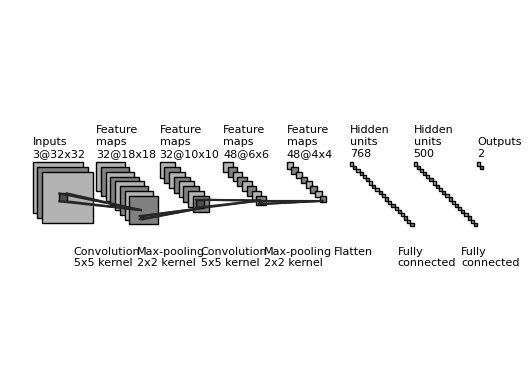

In [ ]:
fc_unit_size = 2
layer_width = 40
flag_omit = False

patches = []
colors = []

fig, ax = plt.subplots()


############################
# conv layers
size_list = [(32, 32), (18, 18), (10, 10), (6, 6), (4, 4)]
num_list = [3, 32, 32, 48, 48]
x_diff_list = [0, layer_width, layer_width, layer_width, layer_width]
text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
loc_diff_list = [[3, -3]] * len(size_list)

num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

for ind in range(len(size_list)-1,-1,-1):
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumConvMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list[ind],
                  num=num_show_list[ind],
                  top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
        num_list[ind], size_list[ind][0], size_list[ind][1]))

############################
# in between layers
start_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
end_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
patch_size_list = [(5, 5), (2, 2), (5, 5), (2, 2)]
ind_bgn_list = range(len(patch_size_list))
text_list = ['Convolution', 'Max-pooling', 'Convolution', 'Max-pooling']

for ind in range(len(patch_size_list)):
    add_mapping(
        patches, colors, start_ratio_list[ind], end_ratio_list[ind],
        patch_size_list[ind], ind,
        top_left_list, loc_diff_list, num_show_list, size_list)
    label(top_left_list[ind], text_list[ind] + '\n{}x{} kernel'.format(
        patch_size_list[ind][0], patch_size_list[ind][1]), xy_off=[26, -65]
    )


############################
# fully connected layers
size_list = [(fc_unit_size, fc_unit_size)] * 3
num_list = [768, 500, 2]
num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

for ind in range(len(size_list)):
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumFcMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list[ind],
                  num=num_show_list[ind],
                  top_left=top_left_list[ind],
                  loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}'.format(
        num_list[ind]))

text_list = ['Flatten\n', 'Fully\nconnected', 'Fully\nconnected']

for ind in range(len(size_list)):
    label(top_left_list[ind], text_list[ind], xy_off=[-10, -65])

############################
for patch, color in zip(patches, colors):
    patch.set_color(color * np.ones(3))
    if isinstance(patch, Line2D):
        ax.add_line(patch)
    else:
        patch.set_edgecolor(Black * np.ones(3))
        ax.add_patch(patch)

plt.tight_layout()
plt.axis('equal')
plt.axis('off')
plt.show()
fig.set_size_inches(8, 2.5)

fig_dir = './'
fig_ext = '.png'
fig.savefig(os.path.join(fig_dir, 'convnet_fig' + fig_ext),
            bbox_inches='tight', pad_inches=0)

## PlotNeuralNet

In [ ]:
!git clone https://github.com/HarisIqbal88/PlotNeuralNet.git
!mkdir /content/PlotNeuralNet/my_project

In [ ]:
!bash /content/PlotNeuralNet/tikzmake.sh /content/PlotNeuralNet/my_project/my_arch

In [ ]:
!pdflatex /content/PlotNeuralNet/examples/VGG16/vgg16.tex